In [2]:
dataset_url='https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ghogaleomkar
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 626k/626k [00:00<00:00, 1.53MB/s]

In [4]:
data_dir ='flight-fare-prediction-mh'

In [11]:
import pandas as pd

In [19]:
! pip install openpyxl

     -------------------------------------- 242.1/242.1 KB 1.9 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import os
os.listdir(data_dir)

['Data_Train.xlsx', 'Sample_submission.xlsx', 'Test_set.xlsx']

In [23]:
df=pd.read_excel(data_dir +'/Data_Train.xlsx')

In [24]:
df["j_day"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [25]:
df["j_month"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [31]:

df["dep_h"]=pd.to_datetime(df["Dep_Time"]).dt.hour
df["dep_m"]=pd.to_datetime(df["Dep_Time"]).dt.minute


In [33]:
df.drop(["Dep_Time"],axis=1,inplace=True)

In [34]:
df["arr_h"]=pd.to_datetime(df.Arrival_Time).dt.hour
df["arr_m"]=pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"],axis=1,inplace=True)

In [43]:
duration=list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+ " 0m"
        else:
            duration[i]="0h " + duration[i]

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))
            

In [44]:
df["du_h"]=duration_hours
df["du_m"]=duration_mins

In [46]:
df.drop(["Duration"],axis=1,inplace=True)

In [48]:
Airline=df[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)

In [49]:
Source=df[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)

In [50]:
Destination=df[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)

In [51]:
df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [103]:
from sklearn.preprocessing import LabelEncoder
le_totalsteps=LabelEncoder()
df['Total_Stops']=le_totalsteps.fit_transform(df['Total_Stops'])
df["Total_Stops"].unique()

array([0, 2, 1, 3, 5, 4], dtype=int64)

In [104]:
dfn=pd.concat([df,Airline,Source,Destination],axis=1)


In [96]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    10683 non-null  object 
 1   Source                                     10683 non-null  object 
 2   Destination                                10683 non-null  object 
 3   Total_Stops                                10682 non-null  float64
 4   Price                                      10683 non-null  int64  
 5   j_day                                      10683 non-null  int64  
 6   j_month                                    10683 non-null  int64  
 7   dep_h                                      10683 non-null  int64  
 8   dep_m                                      10683 non-null  int64  
 9   arr_h                                      10683 non-null  int64  
 10  arr_m                 

In [106]:
X=dfn.drop(columns=["Airline","Source","Destination","Price"],axis=1)
y=dfn.Price

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   j_day                                      10683 non-null  int64
 1   j_month                                    10683 non-null  int64
 2   dep_h                                      10683 non-null  int64
 3   dep_m                                      10683 non-null  int64
 4   arr_h                                      10683 non-null  int64
 5   arr_m                                      10683 non-null  int64
 6   du_h                                       10683 non-null  int64
 7   du_m                                       10683 non-null  int64
 8   Airline_Air India                          10683 non-null  uint8
 9   Airline_GoAir                              10683 non-null  uint8
 10  Airline_IndiGo                             106

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0)


<AxesSubplot:>

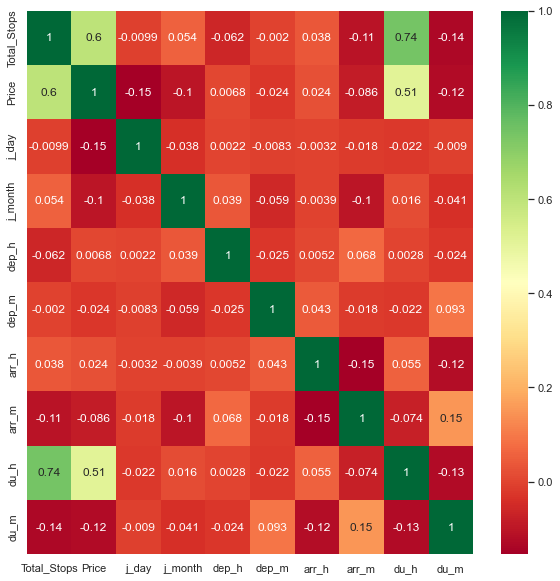

In [108]:
import seaborn as sns
import matplotlib as plt
sns.set(rc={"figure.figsize":(10, 10)})
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")


In [109]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()

In [110]:
model.fit(X_train, y_train)

ExtraTreesRegressor()

In [111]:
yp=model.predict(X_test)

In [114]:
import numpy as np
from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(y_test,yp))
error


2143.6136907016644